<a href="https://colab.research.google.com/github/code-with-ArjunKr/data-analytic/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

step 1 import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

step 2

In [74]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset (1).csv')
(data.head())


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


step 3.1

In [23]:
# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


step 3.2

In [54]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed', dayfirst=True, errors='coerce')

data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


step 3.3

In [25]:
# Initialize the label encoder
le = LabelEncoder()

# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])

# Display the first few rows after encoding
print(data.head())

  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-08-11       2   
1      OD2         Sudha         1            13     8 2017-08-11       3   
2      OD3       Hussain         3             0    13 2017-12-06       4   
3      OD4       Jackson         4            12     4 2016-11-10       3   
4      OD5       Ridhesh         3            18    12 2016-11-10       3   

   Sales  Discount  Profit  State  Order Day  Order Month  Order Year  
0   1254      0.12  401.28      0         11            7        2017  
1    749      0.18  149.80      0         11            7        2017  
2   2360      0.21  165.20      0          6           11        2017  
3    896      0.25   89.60      0         10           10        2016  
4   2355      0.26  918.45      0         10           10        2016  


step 4.1

/tmp/ipython-input-26-771904437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


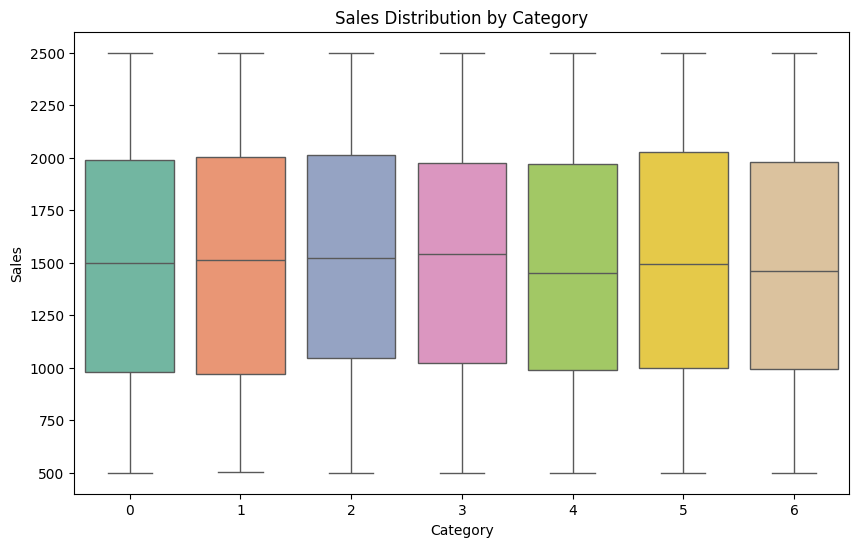

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

step 4.2

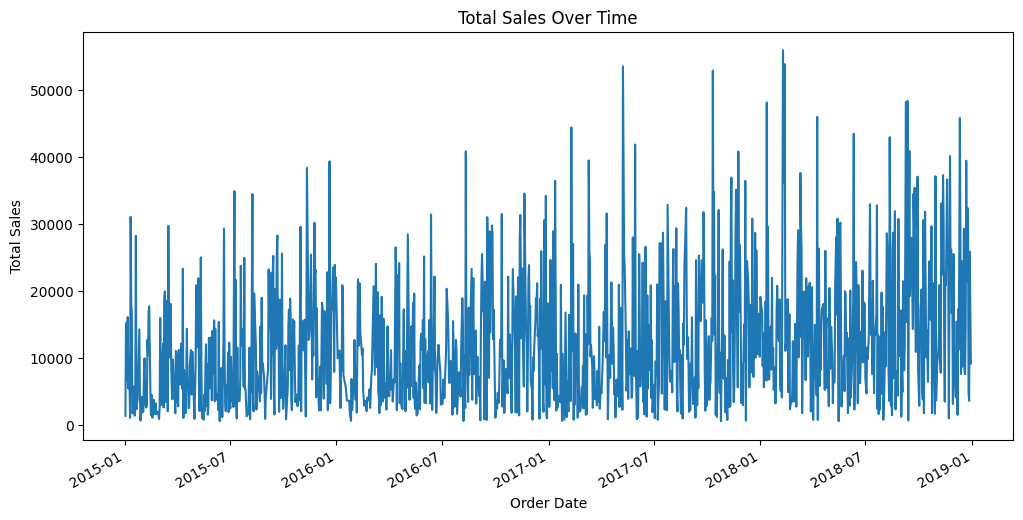

In [27]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()

step 4.3

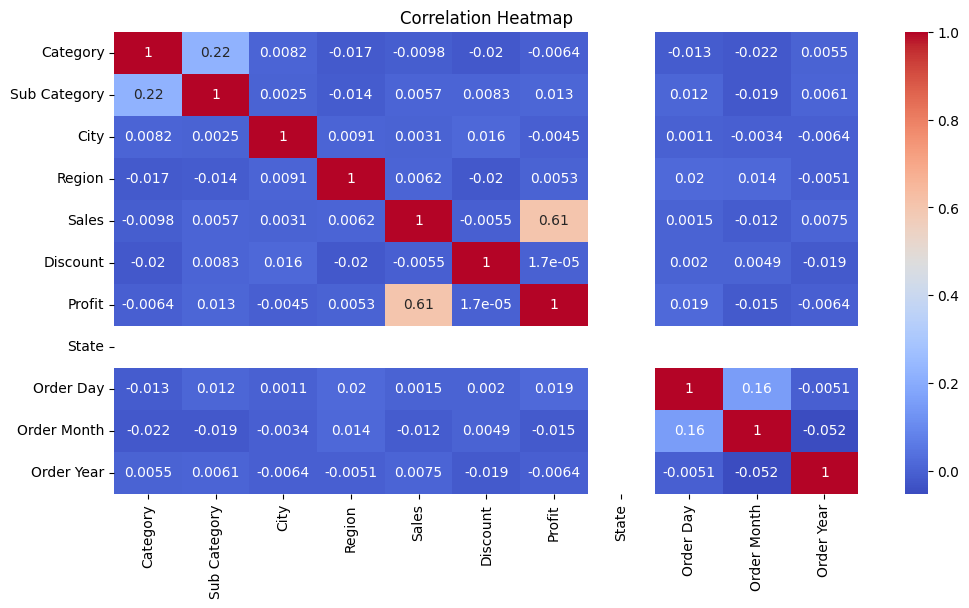

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12, 6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


step 5

In [29]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month'])
target = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

step 6

In [30]:
# Initialize the model
model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

step 7

In [31]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212970.07851629873
R-squared: 0.3542772733694459


step 8.1

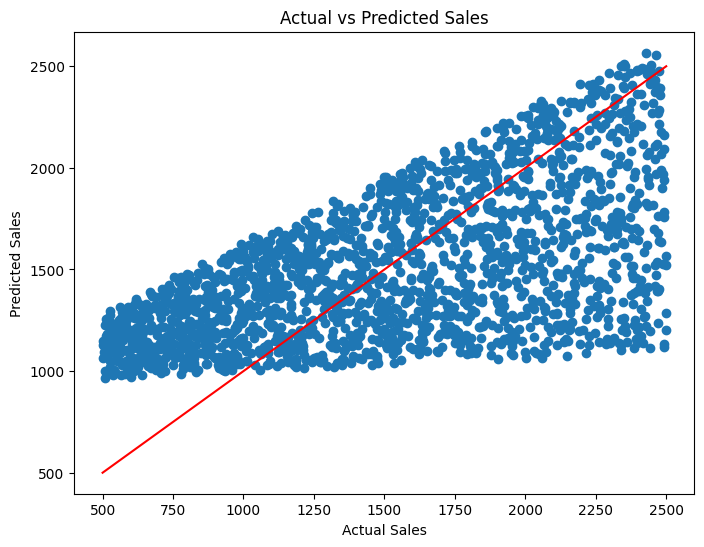

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),

max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [33]:
data.describe()

,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
count,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.0,9994.000000,9994.000000,9994.000000
mean,3.015309,11.090855,11.429258,2017-04-11 12:33:42.973784064,2.053132,1496.596158,0.226817,374.937082,0.0,16.103462,6.174605,2016.722233
min,0.000000,0.000000,0.000000,2015-01-02 00:00:00,0.000000,500.000000,0.100000,25.250000,0.0,1.000000,0.000000,2015.000000
25%,1.000000,5.000000,6.000000,2016-05-01 00:00:00,1.000000,1000.000000,0.160000,180.022500,0.0,10.000000,3.000000,2016.000000
50%,3.000000,11.000000,11.000000,2017-05-30 00:00:00,1.000000,1498.000000,0.230000,320.780000,0.0,15.000000,7.000000,2017.000000
75%,5.000000,17.000000,17.000000,2018-04-09 00:00:00,4.000000,1994.750000,0.290000,525.627500,0.0,23.000000,9.000000,2018.000000
max,6.000000,22.000000,23.000000,2018-12-30 00:00:00,4.000000,2500.000000,0.350000,1120.950000,0.0,31.000000,11.000000,2018.000000
std,2.008006,6.677107,6.931600,NaN,1.629766,577.559036,0.074636,239.932881,0.0,8.064182,3.428273,1.123555


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int64         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(7), object(2)
memory u

In [35]:
categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]
categorical_columns

['Order ID', 'Customer Name']

In [36]:
print("# unique values in Region: {0}".format(len(data['Region'].unique().tolist())))
print("# unique values in City: {0}".format(len(data['City'].unique().tolist())))
print("# unique values in Customer Name: {0}".format(len(data['Customer Name'].unique().tolist())))
print("# unique values in Category: {0}".format(len(data['Category'].unique().tolist())))
print("# unique values in State: {0}".format(len(data['State'].unique().tolist())))
print("# unique values in Sub Category: {0}".format(len(data['Sub Category'].unique().tolist())))

# unique values in Region: 5
# unique values in City: 24
# unique values in Customer Name: 50
# unique values in Category: 7
# unique values in State: 1
# unique values in Sub Category: 23


In [37]:
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,7,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,7,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,11,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,10,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,10,2016


In [49]:
da=data.groupby("Category")
da.first()

,Order ID,Customer Name,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
Category,,,,,,,,,,
Bakery,OD9,Hafiz,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
Beverages,OD2,Sudha,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
"Eggs, Meat & Fish",OD12,Yadav,Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
Food Grains,OD3,Hussain,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
Fruits & Veggies,OD4,Jackson,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
Oil & Masala,OD1,Harish,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
Snacks,OD11,Ganesh,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu


In [50]:
Sales_category=data.groupby("Category")["Sales"].sum()

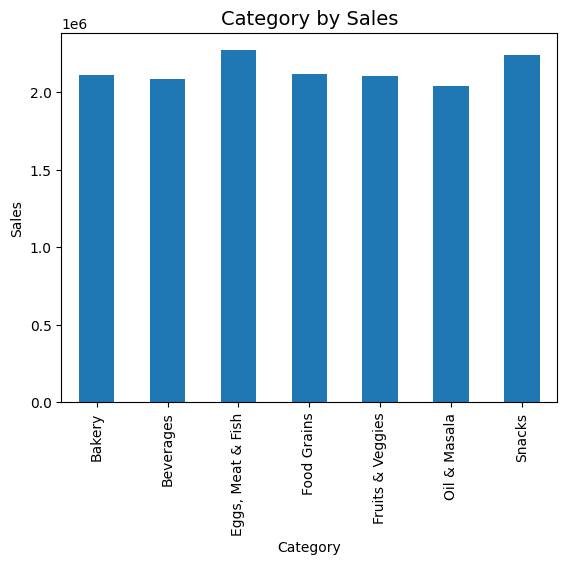

In [51]:
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

In [56]:
monthly_sales = data.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales_sorted = monthly_sales.sort_values(by='Order Month')

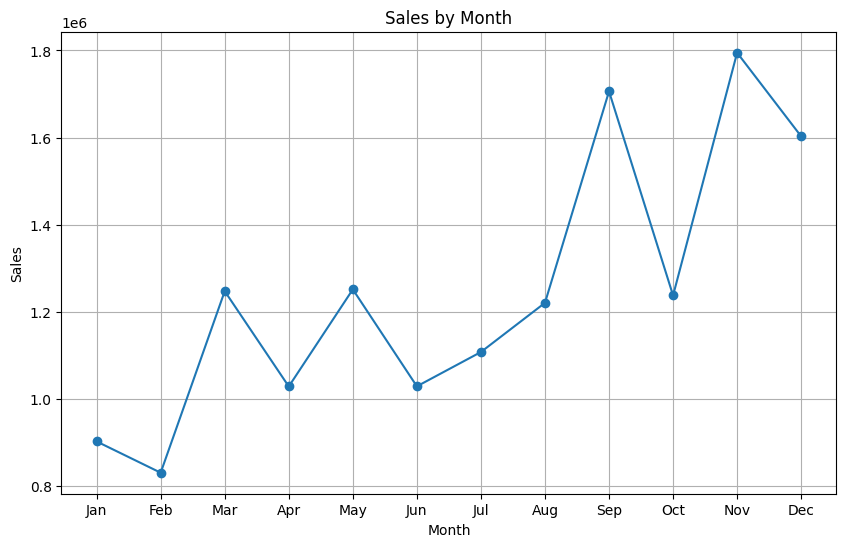

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Order Month'],
monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Order Month'], ['Jan', 'Feb', 'Mar',
'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

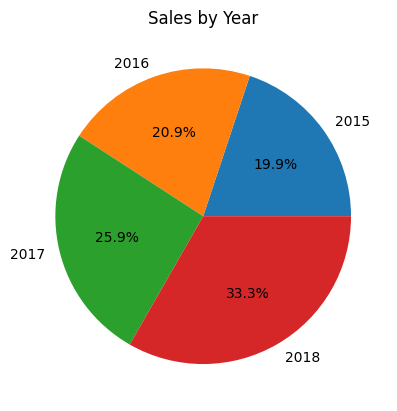

In [70]:
import matplotlib.pyplot as plt

# Extract year from 'Order Date'
data['Year'] = data['Order Date'].dt.year

# Group by year and sum data
Yearly_Sales = data.groupby("Year")["Sales"].sum()

# Create pie chart
plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()


In [71]:
city_sales = data[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',
ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)

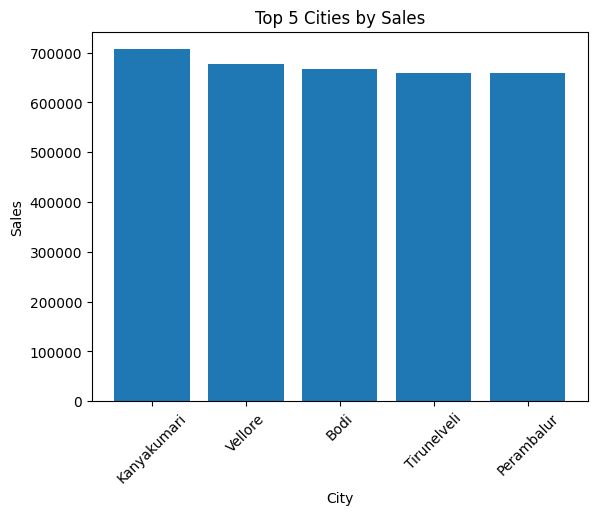

In [72]:
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()